In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from utils.metrics import partsMetrics,allMetrics
from utils.plots import exp_vs_predict

In [3]:
df=pd.read_csv('processed_outliers.csv')
print('Data shape:',df.shape)

Data shape: (519, 7)


In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(519, 6)
(519,)


In [4]:
param_grid={
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ['best','random'],
    'ccp_alpha': np.logspace(-1,-3,3),
    'max_depth': [None, 5, 6, 7, 8, 9, 10, 20, 40, 100, 200],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': range(1,7),
    'max_features': [None,1,2,3,4,'sqrt','log2']
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def train_model(X_train,y_train):
    reg = DecisionTreeRegressor(random_state=0)
    grid=GridSearchCV(reg,param_grid,cv=5,scoring=make_scorer(r2_score),n_jobs=2)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    return grid

In [5]:
model=train_model(X_train,y_train)

{'ccp_alpha': 0.001, 'criterion': 'poisson', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.8650891997942889


In [5]:
best_params={'ccp_alpha': 0.001, 'criterion': 'poisson', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
reg=DecisionTreeRegressor(**best_params,random_state=0)
partsMetrics(df,reg)

train rmse: 1.0310980097009523
val rmse: 5.3176495665415535
test rmse: 3.8723740150672445

train si: 0.08406811090295475
val si: 0.43386777124807396
test si: 0.27826082883092196

train r2: 0.9928408443490184
val r2: 0.8298071295059146
test r2: 0.9268751482550959

train mape: 0.7746528439634227
val mape: 16.27749162102111
test mape: 130.03466431138702


In [6]:
allMetrics(df,reg)

all rmse: 1.2481145154936937
all si: 0.10042023440811672
all r2: 0.9901163681374003
all mape: 4.86431011121784


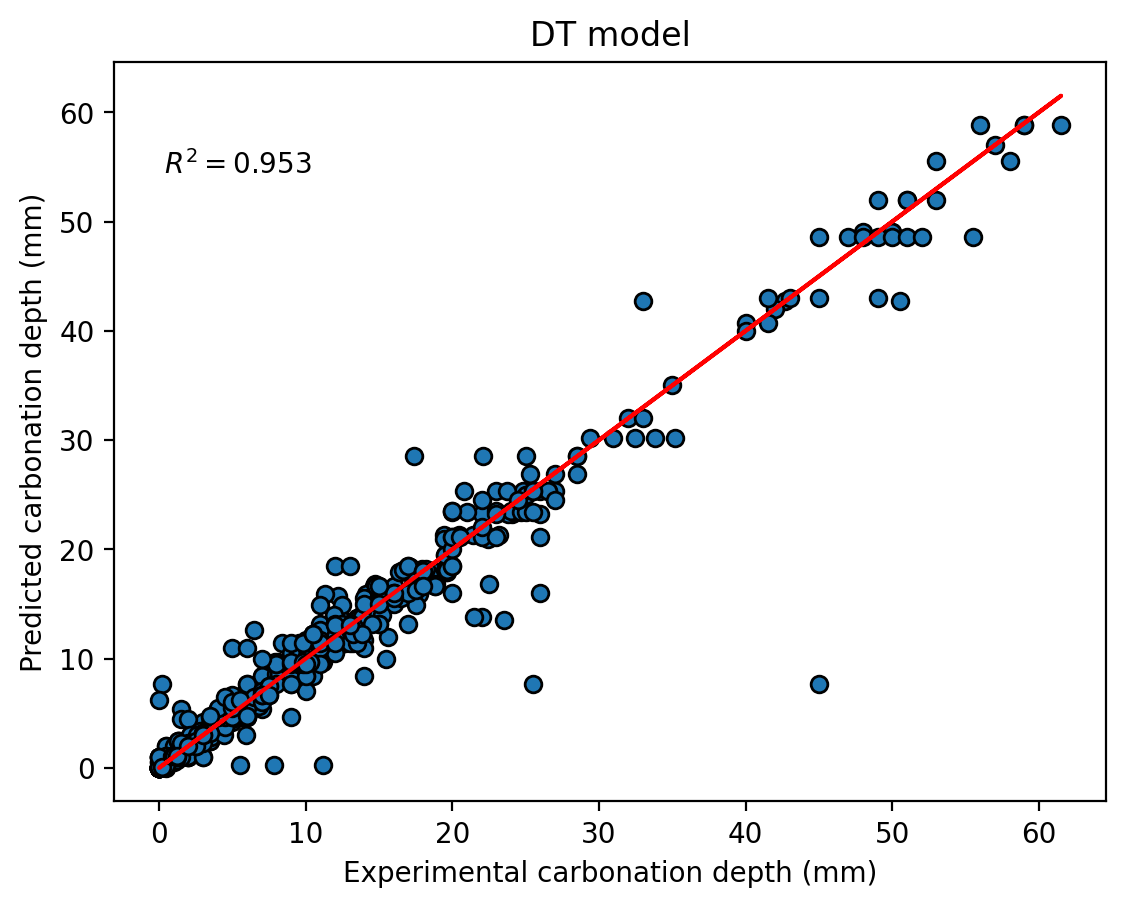

In [8]:
exp_vs_predict(df,reg,'DT model')